# **Flipkart Price Prediction System**

## **Objective**

To predict product prices based on features like category, brand, ratings, and discounts using regression models.

## **1. Importing Libraries**

**Theory:**

We use the following libraries:
- `pandas`: For data manipulation.
- `numpy`: For numerical operations.
- `matplotlib.pyplot` and `seaborn`: For visualizations.
- `sklearn`: For regression modeling and evaluation.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **2. Loading the Dataset**

**Theory:**

We load the dataset and inspect its structure to understand the available data and identify potential issues.

In [6]:
# Load the dataset
file_name = "flipkart_price_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

Dataset Overview:
  Product ID        Category   Brand  Ratings  Number of Reviews  \
0  PROD00001         Fashion  BrandC      2.5                887   
1  PROD00002  Home & Kitchen  BrandD      4.2                560   
2  PROD00003           Books  BrandB      1.3                342   
3  PROD00004         Fashion  BrandD      4.7                996   
4  PROD00005          Sports  BrandD      1.4                416   

   Discount (%)  Stock Quantity  Selling Price  
0            58             122       20914.74  
1            17             398        9246.48  
2            27             419        6911.42  
3            58              78         845.66  
4            52             288       11009.28  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         1000 non-null   object 
 1   Cat

## **3. Data Cleaning and Preprocessing**

**Theory:**

Data cleaning involves handling null values, outliers, and categorical encoding.

- **Null Values**: Check and handle missing values.
- **Encoding**: Convert categorical variables into numerical format using one-hot encoding.
- **Outlier Detection**: Check for extreme values in the target variable.


Missing Values:
Product ID           0
Category             0
Brand                0
Ratings              0
Number of Reviews    0
Discount (%)         0
Stock Quantity       0
Selling Price        0
dtype: int64


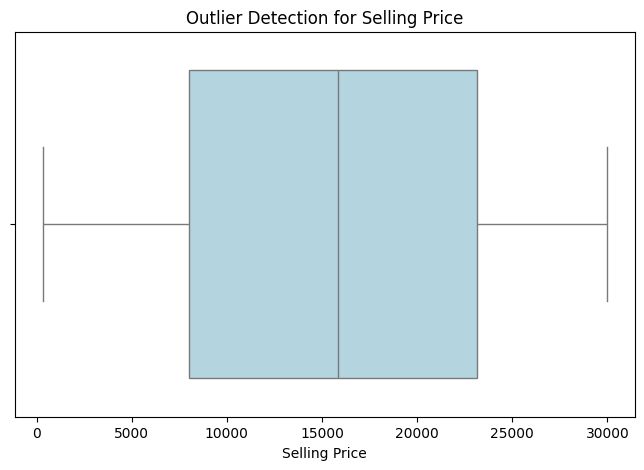


Cleaned Data Sample:
  Product ID  Ratings  Number of Reviews  Discount (%)  Stock Quantity  \
0  PROD00001      2.5                887            58             122   
1  PROD00002      4.2                560            17             398   
2  PROD00003      1.3                342            27             419   
3  PROD00004      4.7                996            58              78   
4  PROD00005      1.4                416            52             288   

   Selling Price  Category_Books  Category_Electronics  Category_Fashion  \
0       20914.74           False                 False              True   
1        9246.48           False                 False             False   
2        6911.42            True                 False             False   
3         845.66           False                 False              True   
4       11009.28           False                 False             False   

   Category_Home & Kitchen  Category_Sports  Brand_BrandB  Brand_BrandC  \
0

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["Category", "Brand"], drop_first=True)

# Check for outliers in the target variable (Selling Price)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Selling Price"], color="lightblue")
plt.title("Outlier Detection for Selling Price")
plt.xlabel("Selling Price")
plt.show()

# Remove outliers in Selling Price (if needed)
q1 = df["Selling Price"].quantile(0.25)
q3 = df["Selling Price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["Selling Price"] >= lower_bound) & (df["Selling Price"] <= upper_bound)]

# Display cleaned data
print("\nCleaned Data Sample:")
print(df.head())

## **4. Exploratory Data Analysis (EDA)**

### **4.1 Correlation Matrix**

**Theory:**

A correlation matrix helps identify relationships between features and the target variable.

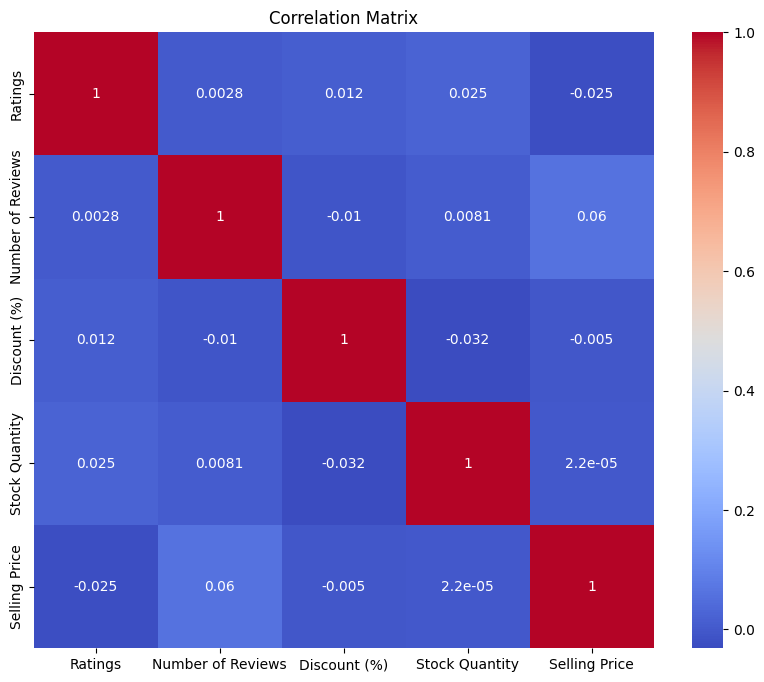

In [15]:
# Compute the correlation matrix
numerical_df = df.select_dtypes(include=np.number) # Select only numerical columns
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### **4.2 Feature-Target Relationships**

**Theory:**

Visualizing how features like discounts and ratings affect the selling price provides insights into their impact.

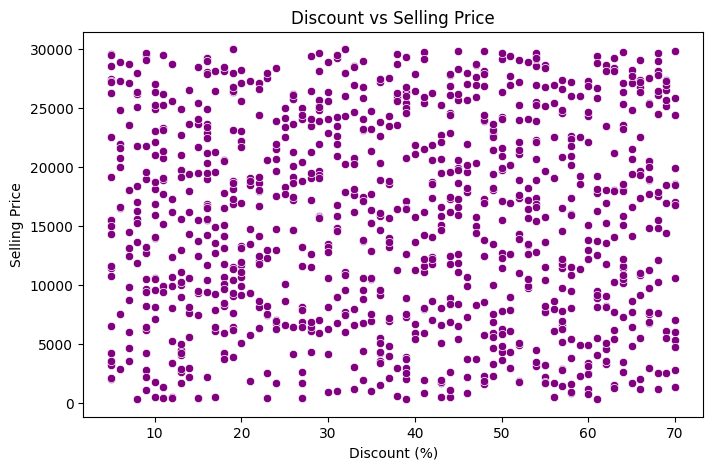

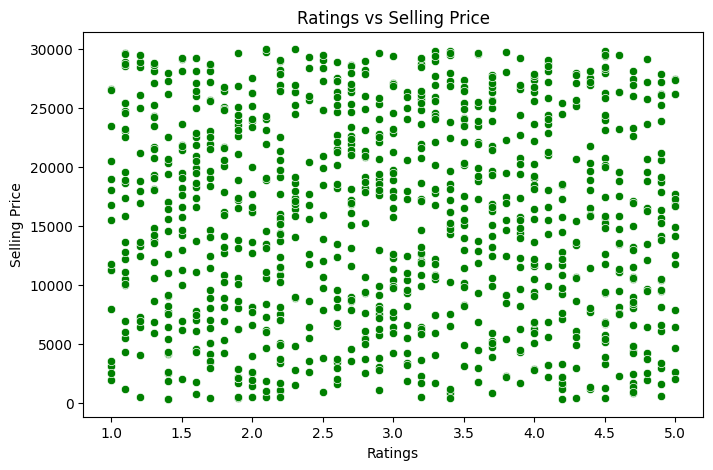

In [9]:
# Scatter plot for Discount (%) vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Discount (%)", y="Selling Price", data=df, color="purple")
plt.title("Discount vs Selling Price")
plt.xlabel("Discount (%)")
plt.ylabel("Selling Price")
plt.show()

# Scatter plot for Ratings vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Ratings", y="Selling Price", data=df, color="green")
plt.title("Ratings vs Selling Price")
plt.xlabel("Ratings")
plt.ylabel("Selling Price")
plt.show()

## **5. Splitting Data for Modeling**

**Theory:**

We split the data into training and testing sets to evaluate model performance.

- **Features (X)**: Independent variables.
- **Target (y)**: Dependent variable (Selling Price).

In [10]:
# Define features and target
X = df.drop(columns=["Selling Price", "Product ID"])
y = df["Selling Price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (800, 12)
Testing Set: (200, 12)


## **6. Model Training and Evaluation**

### **6.1 Linear Regression**

**Theory:**

Linear regression models the relationship between the features and the target variable.

In [11]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 80819104.57
R-squared: -0.04


### **6.2 Feature Importance**

**Theory:**

Understanding which features contribute most to the prediction helps improve the model.

In [12]:
# Display feature importance (coefficients)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    Feature  Coefficient
1         Number of Reviews     2.126041
3            Stock Quantity    -0.924556
2              Discount (%)    -4.205311
10             Brand_BrandC  -130.792098
0                   Ratings  -207.169619
4            Category_Books  -452.347924
9              Brand_BrandB  -577.074871
6          Category_Fashion  -771.993746
11             Brand_BrandD -1076.085184
7   Category_Home & Kitchen -1540.025102
5      Category_Electronics -2202.495749
8           Category_Sports -2245.211483


## **7. Visualizing Predictions**

**Theory:**

Compare predicted and actual prices using a scatter plot.

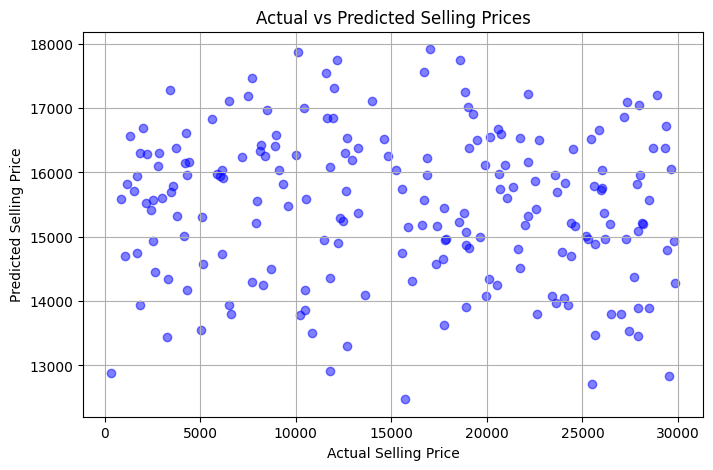

In [13]:
# Scatter plot for predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.title("Actual vs Predicted Selling Prices")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.grid()
plt.show()

## **8. Saving the Model**

**Theory:**

Save the trained model for future use.

In [14]:
# Save the model
import joblib

model_filename = "flipkart_price_prediction_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as flipkart_price_prediction_model.pkl
